### ALS Condition of ALS Patient (K-means and PCA)

The ALS clinical dataset, cleans sparse lab fields, scales numeric variables, and runs PCA to reduce the feature space to two components. It then fits K-Means for k = 2 through k = 6, and picks k = 2 as the best choice. It plots the clusters on the PCA axes. Final metrics and a summary table highlight two groups with distinct lab profiles, showing deeper clinical follow-up to be a good idea.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Upload data
data = pd.read_csv('/Users/Malloryh5/Downloads/als_data.csv')

#### Remove any data that is not relevant to the patient’s ALS condition.

In [3]:
# Review the different columns
data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 101 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    ID                                int64  
 1    Age_mean                          int64  
 2    Albumin_max                       float64
 3    Albumin_median                    float64
 4    Albumin_min                       float64
 5    Albumin_range                     float64
 6    ALSFRS_slope                      float64
 7    ALSFRS_Total_max                  int64  
 8    ALSFRS_Total_median               float64
 9    ALSFRS_Total_min                  int64  
 10   ALSFRS_Total_range                float64
 11   ALT.SGPT._max                     float64
 12   ALT.SGPT._median                  float64
 13   ALT.SGPT._min                     float64
 14   ALT.SGPT._range                   float64
 15   AST.SGOT._max                     int64  
 16   AST.SGOT._median      

In [4]:
# Drop all columns with slope, range, min and max
data = data.loc[:,~data.columns.str.contains('slope|range|min|max', case=False)]

I do not know enough about ALS to know what is important and what is not. I also do not even know what some of these columns mean.I will run a correlation matrix to determine what can be removed.

##### Correlation Matrix

In [5]:
# Make a correlation of the data
cor_data = data.corr()

In [6]:
# Heat map will be too large to understand. Remove any correlations below .2
## Set correlation threshold
threshold = .2
## Set the self correlation to na to remove the columns that correlates with its self
np.fill_diagonal(cor_data.values, np.nan)
## Remove the lower correlations columns
cor_remove = cor_data.columns[(cor_data.abs() > threshold).any()]
## Save these columns
data_f = data[cor_remove]

In [7]:
# Drop repeat ID column
data_f = data_f.drop(columns = ['SubjectID', 'ID'])

In [8]:
data_f.columns

Index(['Age_mean', 'ALSFRS_Total_median', 'ALT.SGPT._median',
       'AST.SGOT._median', 'Bicarbonate_median',
       'Blood.Urea.Nitrogen..BUN._median', 'bp_diastolic_median',
       'bp_systolic_median', 'Chloride_median', 'Creatinine_median',
       'Gender_mean', 'hands_median', 'Hematocrit_median', 'Hemoglobin_median',
       'leg_median', 'mouth_median', 'onset_site_mean', 'Platelets_median',
       'respiratory_median', 'Sodium_median', 'trunk_median',
       'Urine.Ph_median'],
      dtype='object')

In [9]:
# Make a correlation graph of these columns
cor_check = data_f.corr()
# Only highlight the important columns
cor_import = cor_check.mask((cor_check < threshold) | (cor_check < -threshold))
# Drop the self-correlation
np.fill_diagonal(cor_import.values, np.nan)

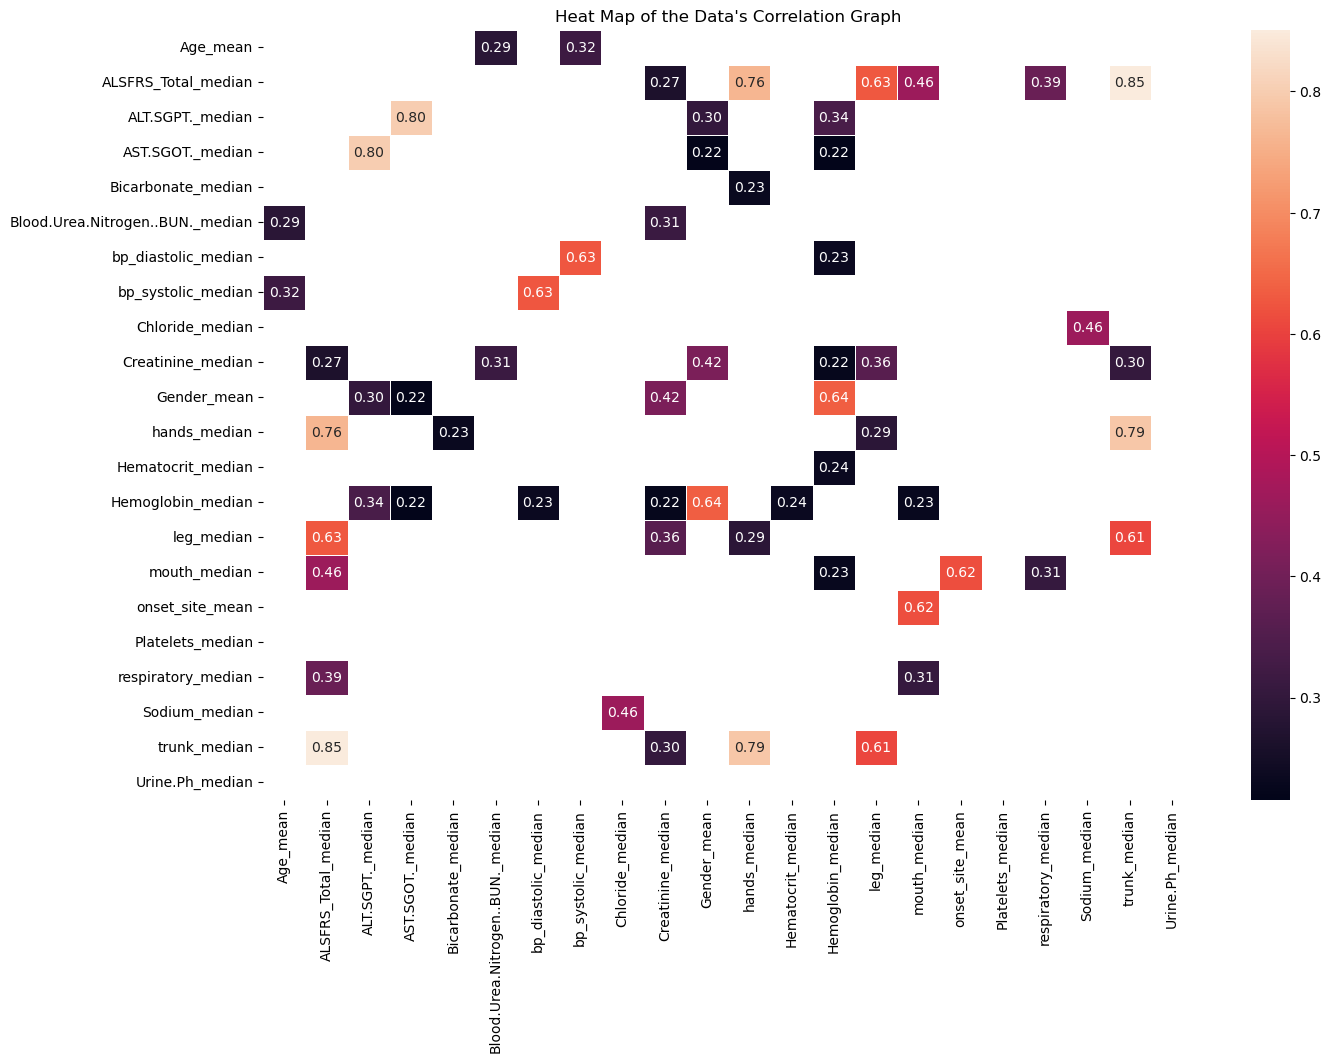

In [10]:
# Use seaborn to make a heatmap
# Figure size
plt.figure(figsize=(15,10))
# Make heatmap
sns.heatmap(cor_import, annot=True, linewidth=.5, fmt='.2f')
# Title
plt.title("Heat Map of the Data's Correlation Graph")
# Print graph
plt.show()

I do not know anything about ASL. Instead of just picking columns to remove, I used a correlation matrix to remove any column with a correlation below .2. I set the threshold to .2 for two reasons: one, 23 is not many columns, and two because it mainly shows correlations of things that are obviously correlated, like both the bp columns. Or the leg and truck column. However, I did not remove them because I am not sure how important they are. I had to remove the columns with self-correlation for it to work. I drop the SubjectID and ID.

#### Apply a standard scalar to the data.

In [11]:
# Allow scaler
scale = StandardScaler()

In [12]:
# Fit transform the data
data_ft = scale.fit_transform(data_f)

#### Plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [13]:
# Empty list
scores = []
# Cluster range
c_range = range(2,15)

In [14]:
# For loop to find clusters
for n_clusters in c_range:
    #find kmeans 
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    # predict the labels
    labels = kmeans.fit_predict(data_ft)
    # find the silhouette score
    silhouette_avg = silhouette_score(data_ft, labels)
    # Append it to the list
    scores.append(silhouette_avg)    

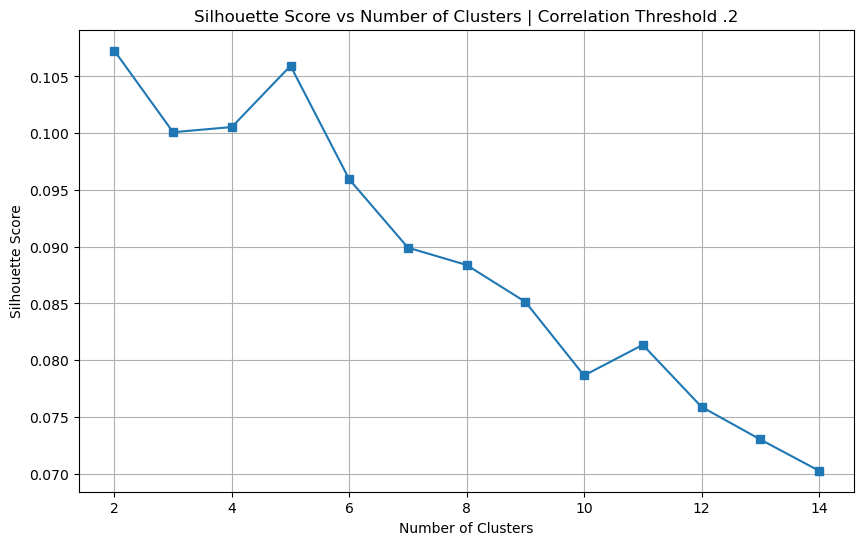

In [15]:
# Plotting
# Plot size
plt.figure(figsize=(10, 6))
# Plot graph
plt.plot(c_range, scores, marker='s')
# Title
plt.title('Silhouette Score vs Number of Clusters | Correlation Threshold .2')
# X-axis label
plt.xlabel('Number of Clusters')
# Y-axis label
plt.ylabel('Silhouette Score')
# Add grid
plt.grid()
# Show plot
plt.show()

#### Use the plot created to choose optimal number of clusters for K-means. 

Using the silhouette score to predict the clusters, the optimal number of clusters is 2. Four clusters for K-means have a silhouette score of about .1. However, this might not be the best method to predict because the silhouette score is so low. The higher the score, the more defined the clusters become.

#### Fit a K-means model to the data with the optimal number of clusters chosen.

In [16]:
# Optimal cluster
o_cluster = 2

In [17]:
# K-means
k_m = KMeans(n_clusters=o_cluster, n_init=10, random_state=42)

In [18]:
# Fit the data.
fit_k_m = k_m.fit(data_ft)
# Show Kmeans
fit_k_m;

KMeans(n_clusters=2, n_init=10, random_state=42)

#### Fit a PCA transformation with two features to the scaled data.

In [19]:
# PCA with two features
pca = PCA(n_components=2)
# Show OCA
pca;

PCA(n_components=2)

In [20]:
# Fit and transform the data based on scatter plot
pca_data = pca.fit_transform(data_ft)

#### Make a scatterplot the PCA transformed data coloring each point by its cluster value.

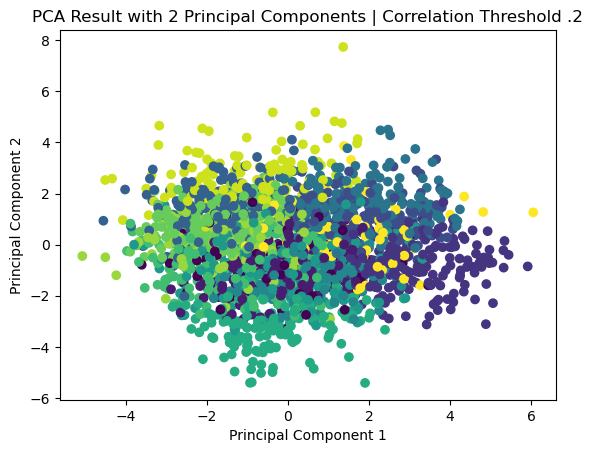

In [21]:
# Scatter plot... I am not sure this is right
plt.scatter(pca_data[:, 0],pca_data[:, 1], c=labels)
# Add tile
plt.title('PCA Result with 2 Principal Components | Correlation Threshold .2')
# Add X-axis label
plt.xlabel('Principal Component 1')
# Add y-axis label
plt.ylabel('Principal Component 2')
# Show
plt.show()

The graph is hard to read. It has clustered the points, but it is too difficult to differentiate between the groups.

#### Add a threshold = .7 to model

In [28]:
# Remove any correlations below .7
## Set correlation threshold
threshold = .7
## Set the self correlation to na to remove the columns that correlates with its self
np.fill_diagonal(cor_data.values, np.nan)
## Remove the lower correlations columns
cor_remove = cor_data.columns[(cor_data.abs() > threshold).any()]
## Save these columns
data_f = data[cor_remove]

# Drop repeat ID column
data_f = data_f.drop(columns = ['SubjectID', 'ID'])

# Allow scaler
scale = StandardScaler()

# Fit transform the data
data_ft = scale.fit_transform(data_f)

# Empty list
scores = []
# Cluster range
c_range = range(2,15)

# For loop to find clusters
for n_clusters in c_range:
    #find kmeans 
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    # predict the labels
    labels = kmeans.fit_predict(data_ft)
    # find the silhouette score
    silhouette_avg = silhouette_score(data_ft, labels)
    # Append it to the list
    scores.append(silhouette_avg)  

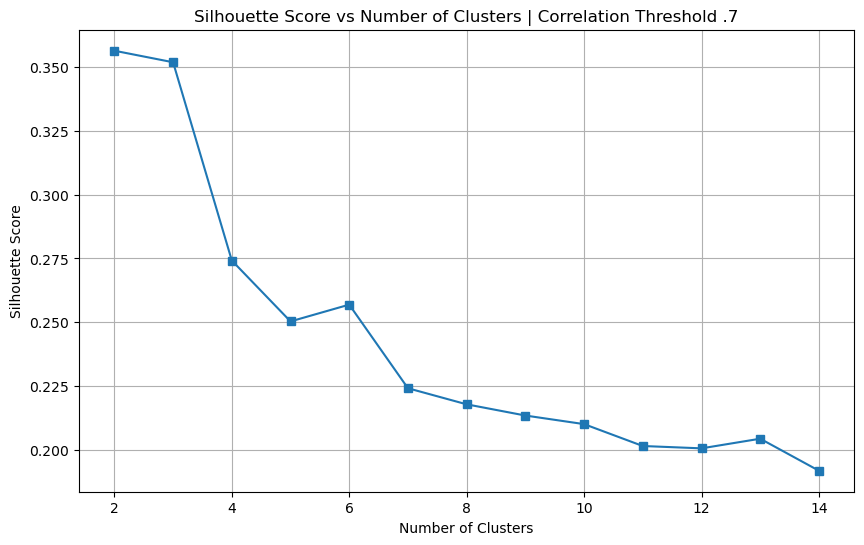

In [30]:
# Plotting
# Plot size
plt.figure(figsize=(10, 6))
# Plot graph
plt.plot(c_range, scores, marker='s')
# Title
plt.title('Silhouette Score vs Number of Clusters | Correlation Threshold .7')
# X-axis label
plt.xlabel('Number of Clusters')
# Y-axis label
plt.ylabel('Silhouette Score')
# Add grid
plt.grid()
# Show plot
plt.show()

In [31]:
# Fit and transform the data based on scatter plot
pca_data = pca.fit_transform(data_ft)

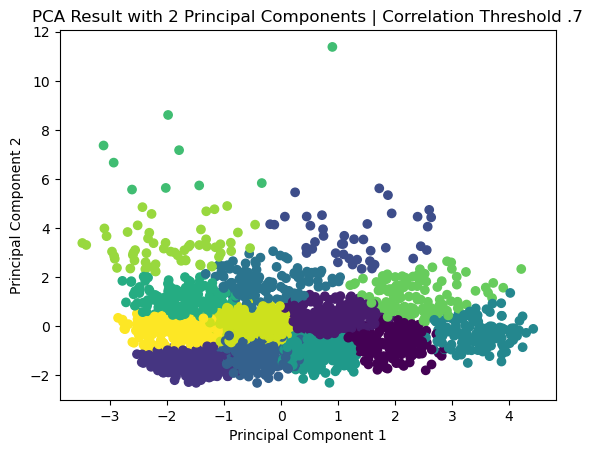

In [32]:
# Scatter plot... I am not sure this is right
plt.scatter(pca_data[:, 0],pca_data[:, 1], c=labels)
# Add tile
plt.title('PCA Result with 2 Principal Components | Correlation Threshold .7')
# Add X-axis label
plt.xlabel('Principal Component 1')
# Add y-axis label
plt.ylabel('Principal Component 2')
# Show
plt.show()

#### Conclusion.

I ran the test multiple times and changed the threshold each time. However, I only included two of the tests. Only including columns that correlate more than .2 allows the prediction to consider more things when making predictions to ensure the model does not overfit, but the clusters are not as good. If .2 is used to decide what columns to keep, I believe a different model would be best.

Raising the threshold for the correlation to .7 in regards to whether or not to include the column improves the clusters, but this can cause the model to overfit. Not that it has caused overfitting, but it can. I did .2 in the beginning because I did not want to exclude so much information. If .7 is used as a threshold to decide what columns to keep, it is better but not great. It might still be better to use a different model, but it does not have to be. It is at a reasonable level. The Silhouette Score to around .35, which is even better, but preferable the score should be around .5 or more.

In [27]:
# Show everything to print PDF
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)